# Time Series Analysis as POC

This Notebook should give an introduction to the analytical possibilities within python and its related packages. It will provide an insight into some basic posibilities to analyze time series as well as some more in-depth machine learning aproaches.

# Ressources used

https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

In [8]:
# Import packages which are needed
import random
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot

import matplotlib.pyplot as plt

import itertools
# set seed to get the same outcome
random.seed(7)

In [3]:
# define the random walk function
def random_generator(N=1000):
    rng = pd.date_range("1/1/2000", periods=N, freq="D")
    return pd.Series(10+np.cumsum(np.random.uniform(-0.5,0.5,(N))), index=rng)

2000-01-01    10.404534
2000-01-02    10.827783
2000-01-03    10.581582
2000-01-04    10.179008
2000-01-05     9.679771
Freq: D, dtype: float64


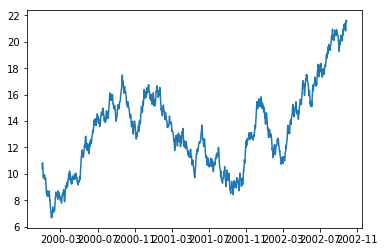

In [4]:
# plot the random generator
ts = random_generator(N=1000)

# Show the head of the ts
print(ts.head())
plt.plot(ts)
plt.show()

In [5]:
# import the packages necessary for time series analysis
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

# create a function to test for stationarity
def test_stationarity(timeseries):
    # https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
    # Determine rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std

    # Plot rolling statistics
    orig = plt.plot(timeseries, color="blue", label="Original")
    mean = plt.plot(rolmean, color="red",label="Rolling Mean")
    std = plt.plot(timeseries, color="black",label="Rolling Std")
    plt.legend(loc="best")
    plt.title("Rolling Mean & Standard Deviation")
    plt.show(block=False)

    # Perform Dickey Fuller test 
    print("Results of Dickey-Fuller Test:")
    dftest=adfuller(timeseries,autolag="AIC")
    dfoutput=pd.Series(dftest[0:4], index=["Test Statistic","p-Value","# Lags Used","Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput[f"Critical Value ({key})"] = value
        print(dfoutput)

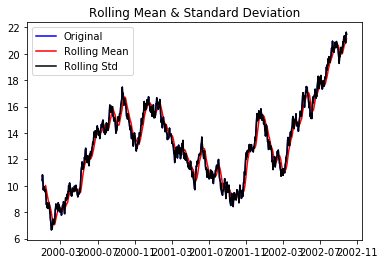

Results of Dickey-Fuller Test:
Test Statistic                  -0.421230
p-Value                          0.906493
# Lags Used                      0.000000
Number of Observations Used    999.000000
Critical Value (1%)             -3.436913
dtype: float64
Test Statistic                  -0.421230
p-Value                          0.906493
# Lags Used                      0.000000
Number of Observations Used    999.000000
Critical Value (1%)             -3.436913
Critical Value (5%)             -2.864437
dtype: float64
Test Statistic                  -0.421230
p-Value                          0.906493
# Lags Used                      0.000000
Number of Observations Used    999.000000
Critical Value (1%)             -3.436913
Critical Value (5%)             -2.864437
Critical Value (10%)            -2.568313
dtype: float64


In [6]:
# test the series for stationarity
test_stationarity(ts)

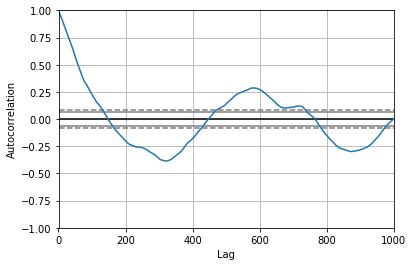

In [10]:
# Create the autocorrelation plot
autocorrelation_plot(ts)
plt.show()

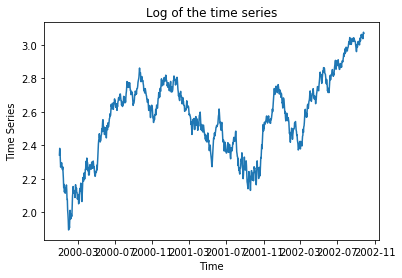

In [13]:
# Take the log of the series to make it stationary
ts_log = np.log(ts)
plt.plot(ts_log)
plt.title("Log of the time series")
plt.xlabel("Time")
plt.ylabel("Time Series")
plt.show()

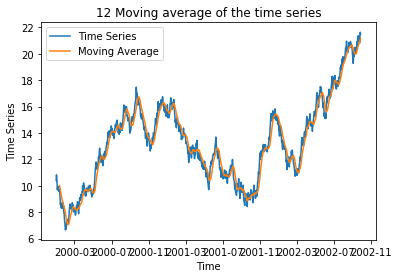

In [20]:
# Create a moving average of the series
mavg12 = ts.rolling(12).mean()
plt.plot(ts, label = "Time Series")
plt.plot(mavg12, label = "Moving Average")
plt.title("12 Moving average of the time series")
plt.xlabel("Time")
plt.ylabel("Time Series")
plt.legend(loc="best")
plt.show()

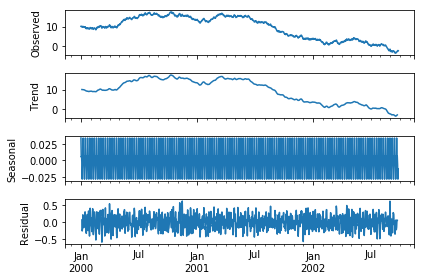

In [37]:
# Decompose the series into seasonal trends with statsmodels
decomp = sm.tsa.seasonal_decompose(ts, model="additive")
decomp.plot()
plt.show()

## Implement a seasonal ARIMA model

In [38]:
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x [1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [39]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(ts,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7637.480958253291


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6320.287338077853
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2685.647898795114
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2646.483473548223
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2680.75393348099
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2666.8394843514516
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2644.354723351517
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2626.0032236267207
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6279.564365340204
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5019.976718289294
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1853.0222719787132
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1835.07734302803
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1849.0250221166866
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1847.5749055884742
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1838.5211741913695
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1828.758641612322
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:292.2472849760943
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:294.5692702384247
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:961.41925605805
ARIMA(0,

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:297.86911641027484
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:920.526178031269
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:332.05333771776304
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:296.68209423453766
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:297.86321120956836
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:674.2325267400515
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:334.05393619166375
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:295.1115856736249


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:299.1560725603422
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:921.5585551544236
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:331.8375331730137
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:298.3782147132159
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:299.2901627673724
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:676.2094606736973
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:333.8378662555327
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:293.8971465722269
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:296.2671713712056
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:960.6599006079675
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:330.20559985906874
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:296.18951042707903
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:297.9460666825188
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:695.605698399025
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:332.20603080214744
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:296.3202999630063
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:295.8701450399679
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:960.5370414124764
ARIMA(1,

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.0122      0.032      0.384      0.701      -0.050       0.074
sigma2         0.0786      0.006     14.285      0.000       0.068       0.089


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


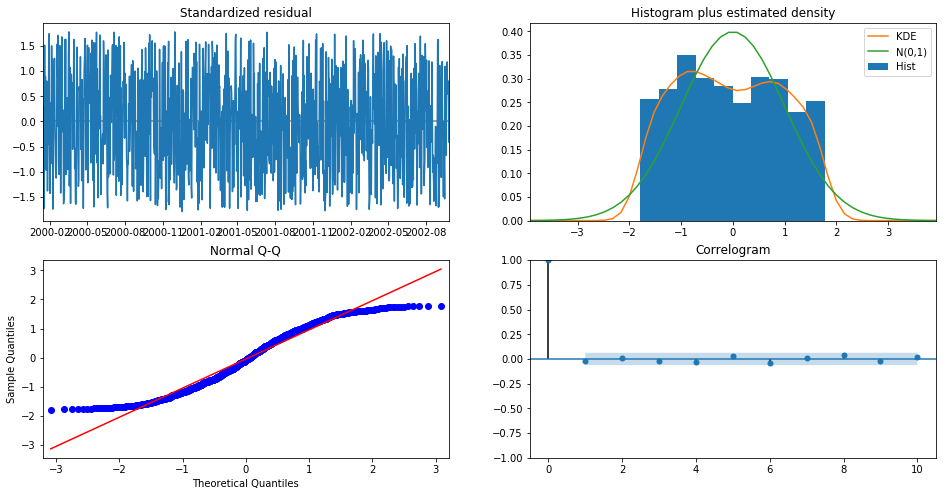

In [40]:
# Take the best model and train it
mod = sm.tsa.statespace.SARIMAX(ts,
                               order=(0, 1, 0),
                               seasonal_order=(0, 0, 1, 12),
                               enforce_stationarity=False,
                               enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(16,8))
plt.show()

### Make prediction using the model

2002-09-26 00:00:00


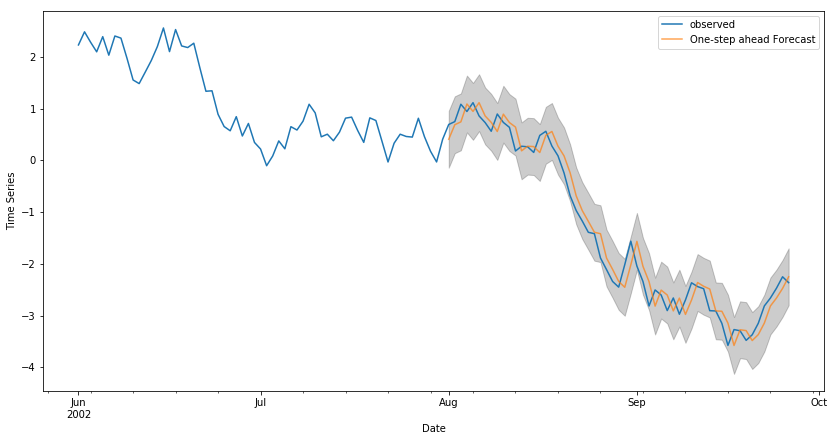

In [56]:
# get the last index of the series
print(ts.index[-1])

# predict the later values
pred = results.get_prediction(start=pd.to_datetime("2002-08-01"))
pred_ci = pred.conf_int()
ax = ts['2002-06-01':].plot(label="observed")
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Time Series')
plt.legend()
plt.show()

In [21]:
# Calculate the mean-squared error of the prediction
ts_forecasted = pred.predicted_mean
ts_truth = ts['2002-08-01':]
mse = ((ts_forecasted - ts_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# Calculate the root mean squared error of the prediction
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 4)))

NameError: name 'pred' is not defined